# Set-up
## Imports, load the dataset

In [90]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize
import tensorflow as tf
import os

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes.DESCR

'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nBradley Efr

## Split the dataset into training and test

test size: 132


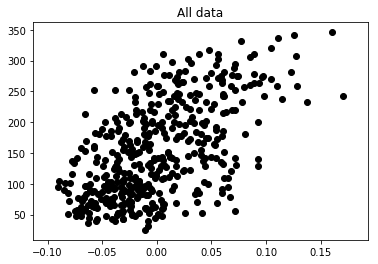

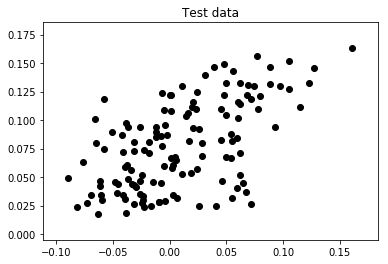

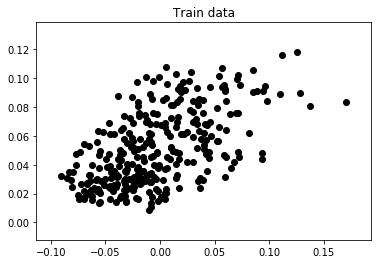

In [91]:
# Use only one feature
shuffle_ids = np.random.permutation(diabetes.data.shape[0])
diabetes_X = diabetes.data[shuffle_ids, np.newaxis, 2]
diabetes_y = diabetes.target[shuffle_ids]
test_size  = int(diabetes.data.shape[0] * 0.3)
print('test size: ' + str(test_size))

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-test_size]
diabetes_X_test  = diabetes_X[-test_size:]

# Split the targets into training/testing sets
diabetes_y_train = normalize(diabetes_y[:-test_size, np.newaxis], axis=0)
diabetes_y_test  = normalize(diabetes_y[-test_size:, np.newaxis], axis=0)

# Plot data
plt.scatter(diabetes.data[:, np.newaxis, 2], diabetes.target,  color='black')
plt.title('All data')
plt.show()

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.title('Test data')
plt.show()

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.title('Train data')
plt.show()

# Training
## Define the linear regression model

In [92]:
# Parameters
learning_rate   = 0.1
n_samples       = diabetes_X_train.shape[0]

tf.reset_default_graph()

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.get_variable("weight", [1, 1], dtype=tf.float32, initializer=tf.glorot_uniform_initializer())
b = tf.get_variable("bias", [1], dtype=tf.float32, initializer=tf.glorot_uniform_initializer())

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.losses.mean_squared_error(Y, pred)

# Summaries
tf.summary.scalar('loss', cost)
tf.summary.scalar('W', tf.reduce_max(W))
tf.summary.scalar('b', tf.reduce_max(b))
summaries = tf.summary.merge_all()

# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

## Training

Epoch: 0000 cost= 0.826073229 W= [[-1.2351017]] b= [-0.86047852]
Epoch: 0001 cost= 0.655542552 W= [[-1.32823515]] b= [-0.76088989]
Epoch: 0002 cost= 0.506090164 W= [[-1.40066552]] b= [-0.66206086]
Epoch: 0003 cost= 0.377657920 W= [[-1.434219]] b= [-0.56440485]
Epoch: 0004 cost= 0.269938648 W= [[-1.42651713]] b= [-0.46841016]
Epoch: 0005 cost= 0.182395265 W= [[-1.38911748]] b= [-0.37464505]
Epoch: 0006 cost= 0.114189222 W= [[-1.33255327]] b= [-0.28376126]
Epoch: 0007 cost= 0.064106062 W= [[-1.26331973]] b= [-0.19649248]
Epoch: 0008 cost= 0.030515905 W= [[-1.18523896]] b= [-0.11364208]
Epoch: 0009 cost= 0.011371824 W= [[-1.100649]] b= [-0.03605922]
Epoch: 0010 cost= 0.004253413 W= [[-1.0110656]] b= [ 0.03539779]
Epoch: 0011 cost= 0.006462935 W= [[-0.91753393]] b= [ 0.0999112]
Epoch: 0012 cost= 0.015173254 W= [[-0.82082283]] b= [ 0.15676071]
Epoch: 0013 cost= 0.027612403 W= [[-0.72153836]] b= [ 0.20537901]
Epoch: 0014 cost= 0.041257177 W= [[-0.62019378]] b= [ 0.24539724]
Epoch: 0015 cost=

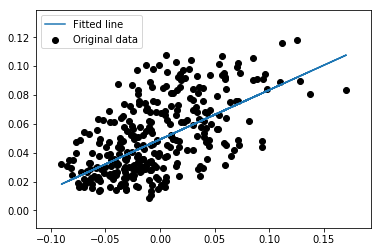

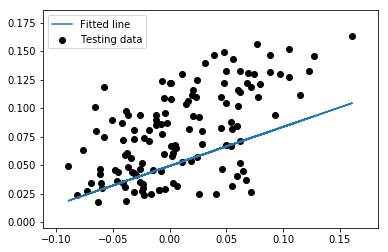

In [94]:
# Constants, create necessary dirs if they don't exist
training_epochs = 100
display_step    = 1

log_dir_base  = './log'
plot_dir_base = './plot'

if not os.path.exists(plot_dir_base): os.makedirs(plot_dir)
if not os.path.exists(log_dir_base ): os.makedirs(log_dir)
    
log_dir  = log_dir_base + '/' + str(len(os.listdir(log_dir_base)))
plot_dir = plot_dir_base + '/' + str(len(os.listdir(plot_dir_base)))

if not os.path.exists(plot_dir): os.makedirs(plot_dir)

train_writer  = tf.summary.FileWriter(log_dir)

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: diabetes_X_train, Y: diabetes_y_train})
        
        # Display logs per epoch step
        if (epoch) % display_step == 0:
            # Write summaries for tensorboard
            sums, c, train_pred, W_res, b_res = sess.run([summaries, cost, pred, W, b], feed_dict={X: diabetes_X_train, Y: diabetes_y_train})
            train_writer.add_summary(sums, epoch)
            train_writer.flush()
            
            # Plot the model and save to file
            plt.scatter(diabetes_X_train, diabetes_y_train, label='Original data', color='black')
            plt.plot(diabetes_X_train, train_pred, label='Fitted line')
            plt.ylim(0, 0.2)
            plt.legend()
            plt.title('Epoch ' + str(epoch) + '. ' + 'W = ' + "{:.4f}".format(W_res[0, 0]) + '; b = ' + "{:.4f}".format(b_res[0]))
            plt.savefig(plot_dir + '/' + ('%04d' % epoch) + '.png')
            plt.clf()
            
            print("Epoch:", '%04d' % (epoch), "cost=", "{:.9f}".format(c), \
                "W=", W_res, "b=", b_res)

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: diabetes_X_train, Y: diabetes_y_train})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    diabetes_y_train_pred = sess.run(pred, feed_dict={X: diabetes_X_train})
    diabetes_y_test_pred  = sess.run(pred, feed_dict={X: diabetes_X_test })
    
    plt.scatter(diabetes_X_train, diabetes_y_train, label='Original data', color='black')
    plt.plot(diabetes_X_train, diabetes_y_train_pred, label='Fitted line')
    plt.legend()
    plt.show()

    plt.scatter(diabetes_X_test, diabetes_y_test, label='Testing data', color='black')
    plt.plot(diabetes_X_test, diabetes_y_test_pred, label='Fitted line')
    plt.legend()
    plt.show()


In [89]:
%%bash -s "$plot_dir"
echo "Creating video at $1"
cd $1
ffmpeg -r 15 -f image2 -i %04d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p video.mp4

Creating video at ./plot/10


ffmpeg version 2.8.11-0ubuntu0.16.04.1 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.4) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e